# Reading C3S SM data in python

## With xarray

The easiest way to load C3S SM image data as downloaded from CDS into memory
is by using [xarray](https://docs.xarray.dev/en/stable/).

When xarray is installed, it can be used to load one or multiple C3S SM
images into memory and merge them into a data cube along the time dimension.

### Loading a single C3S SM netcdf image
In the first example we simply load one image as an xarray Dataset:

In [1]:
# to install xarray see https://docs.xarray.dev/en/stable/
import xarray as xr
img = xr.open_dataset("./../../tests/c3s_sm-test-data/img/TCDR/060_dailyImages/combined/2014/C3S-SOILMOISTURE-L3S-SSMV-COMBINED-DAILY-20140101000000-TCDR-v201801.0.0.nc")

From there on we can use xarray functionality extract numpy array, plot data, convert them into pandas DataFrames etc.

### Loading and stacking multiple C3S SM images

To load multiple images at once, we can use `xarray.open_mfdataset`. For this
we have to make sure that the [`dask` library](https://www.dask.org/) is installed (e.g. via 
``conda install dask``). In the example below we just load 2 images from the
test data.


In [2]:
import dask   # make sure dask is installed
#  - conda install dask - https://www.dask.org/
import xarray as xr

ds = xr.open_mfdataset("./../../tests/c3s_sm-test-data/img/TCDR/060_dailyImages/combined/**/*.nc")
ds

<xarray.Dataset> Size: 75MB
Dimensions:         (time: 2, lat: 720, lon: 1440)
Coordinates:
  * lat             (lat) float32 3kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 16B 2014-01-01 2014-01-02
Data variables:
    t0              (time, lat, lon) datetime64[ns] 17MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    sm              (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sm_uncertainty  (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    dnflag          (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag            (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    freqbandID      (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    mode            (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sensor          (time, lat, lon) float32 8MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/40)
    title:                      C3S Surface Soil Moisture COMBINED active+pas...
    institution:                EODC (AUT); TU Wien (AUT); VanderSat B.V. (NL)
    contact:                    C3S_SM_Science@eodc.eu
    source:                     WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Moistu...
    platform:                   Nimbus 7, DMSP, TRMM, AQUA, Coriolis, GCOM-W1...
    sensor:                     SMMR, SSM/I, TMI, AMSR-E, WindSat, AMSR2, SMO...
    ...                         ...
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    spatial_resolution:         25km

Afterwards the image data will be loaded as dask arrays, and we can select
time stamps to extract from the stack.

In [3]:
# extract the first time stamp and a spatial subset
img = ds.isel(time=0).sel(lon=slice(-20, 40), lat=slice(60, 30))
img

<xarray.Dataset> Size: 1MB
Dimensions:         (lat: 120, lon: 240)
Coordinates:
  * lat             (lat) float32 480B 59.88 59.62 59.38 ... 30.62 30.38 30.12
  * lon             (lon) float32 960B -19.88 -19.62 -19.38 ... 39.62 39.88
    time            datetime64[ns] 8B 2014-01-01
Data variables:
    t0              (lat, lon) datetime64[ns] 230kB dask.array<chunksize=(120, 80), meta=np.ndarray>
    sm              (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    sm_uncertainty  (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    dnflag          (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    flag            (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    freqbandID      (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    mode            (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
    sensor          (lat, lon) float32 115kB dask.array<chunksize=(120, 240), meta=np.ndarray>
Attributes: (12/40)
    title:                      C3S Surface Soil Moisture COMBINED active+pas...
    institution:                EODC (AUT); TU Wien (AUT); VanderSat B.V. (NL)
    contact:                    C3S_SM_Science@eodc.eu
    source:                     WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Moistu...
    platform:                   Nimbus 7, DMSP, TRMM, AQUA, Coriolis, GCOM-W1...
    sensor:                     SMMR, SSM/I, TMI, AMSR-E, WindSat, AMSR2, SMO...
    ...                         ...
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    spatial_resolution:         25km

## With c3s_sm.interface
We provide our own image readers in this package. They are mainly used for the conversion
to time series, but can also be used to load the data as numpy arrays. They are based on 
the netCDF4 python package (don't require xarray). There is one reader
to read a single netcdf file, and one to find the image for a date in a file collection.

For most users the above described use of xarray is probably preferred!

### Image reader

In [4]:
from c3s_sm.interface import C3SImg
import numpy as np
from datetime import datetime

img = C3SImg("./../../tests/c3s_sm-test-data/img/TCDR/060_dailyImages/combined/2014/C3S-SOILMOISTURE-L3S-SSMV-COMBINED-DAILY-20140101000000-TCDR-v201801.0.0.nc").read(datetime(2014,1,1))

This will create an Image object which is basically just a container for numpy arrays, netcdf attributes and dimension variables (lat, lon, time).

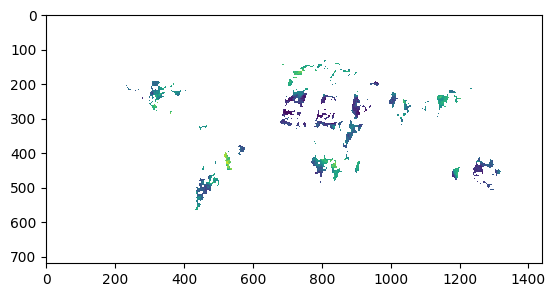

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img.data['sm'])

In [6]:
"Image coordinates", img.lat, img.lon, img.timestamp

('Image coordinates',
 array([[ 89.875,  89.875,  89.875, ...,  89.875,  89.875,  89.875],
        [ 89.625,  89.625,  89.625, ...,  89.625,  89.625,  89.625],
        [ 89.375,  89.375,  89.375, ...,  89.375,  89.375,  89.375],
        ...,
        [-89.375, -89.375, -89.375, ..., -89.375, -89.375, -89.375],
        [-89.625, -89.625, -89.625, ..., -89.625, -89.625, -89.625],
        [-89.875, -89.875, -89.875, ..., -89.875, -89.875, -89.875]]),
 array([[-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        ...,
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875]]),
 datetime.datetime(2014, 1, 1, 0, 0))

### Multi-image reader

The image to time series conversion requires a class that reads image data for a time stamp from a directory with multiple files. The class is used as follows:


In [7]:
from c3s_sm.interface import C3S_Nc_Img_Stack
from datetime import datetime

stack = C3S_Nc_Img_Stack("./../../tests/c3s_sm-test-data/img/TCDR/060_dailyImages/combined/", fillval=np.nan)
ts = datetime(2014, 1, 1)
image = stack.read(ts)

Text(0.5, 1.0, 'SM at 2014-01-01')

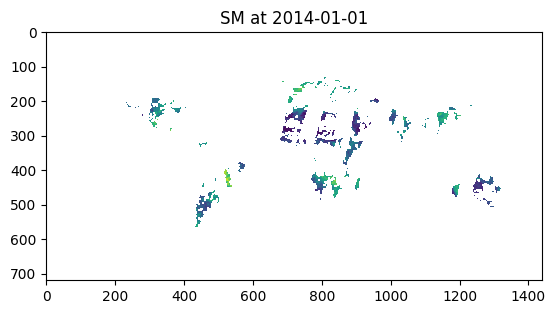

In [8]:
plt.imshow(image.data['sm'])
plt.title(f"SM at {str(ts.date())}")